Number of examples: 50


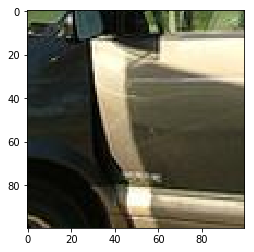

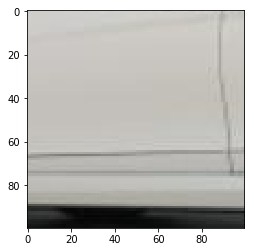

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

tar_vc=0
ori_vc=10
dict_file = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_car_VGG16_pool4_K200_vMFMM30.pickle'
example_file = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_car_VGG16_pool4_K200_vMFMM30_example.pickle'
img_mean = np.array([104., 117., 124.]).reshape(1,1,1,3)

with open(dict_file, 'rb') as fh:
    _, centers, _ = pickle.load(fh)
    
target = centers[tar_vc]

with open(example_file, 'rb') as fh:
    examples = pickle.load(fh)
    
images_ori = examples[ori_vc].T
img_num = images_ori.shape[0]
print('Number of examples: {}'.format(img_num))
images_ori = images_ori.reshape(img_num, 100,100,3).astype('uint8')
images_target = examples[tar_vc].T
images_target = images_target.reshape(img_num, 100,100,3).astype('uint8')
plt.imshow(images_ori[0][:,:,[2,1,0]])
plt.show()
plt.imshow(images_target[0][:,:,[2,1,0]])
plt.show()


In [2]:
from pgd_attack import LinfPGDAttack
images_ori = images_ori.astype('float64')
images_ori -= img_mean
cache_dir = '/export/home/qliu24/qing_voting_139/qing_voting_py/cache/'
model = LinfPGDAttack(cache_dir, target, k=1000,a=0.1)
output = model.perturb(images_ori)

2017-07-25 18:47:58.787927: Start Init
INFO:tensorflow:Restoring parameters from /export/home/qliu24/qing_voting_139/qing_voting_py/cache/checkpoints_vgg/vgg_16.ckpt
2017-07-25 18:47:59.205985: Finish Init
iter 0: loss 40.6972541809082
iter 100: loss 22.450927734375
iter 200: loss 21.17322540283203
iter 300: loss 20.797128677368164
iter 400: loss 20.63321304321289
iter 500: loss 20.51270294189453
iter 600: loss 20.427122116088867
iter 700: loss 20.36656951904297
iter 800: loss 20.320714950561523
iter 900: loss 20.275840759277344


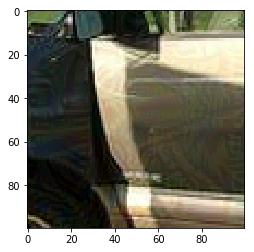

In [3]:
output += img_mean
output = np.clip(output,0,255)
output = output.astype('uint8')
plt.imshow(output[0][:,:,[2,1,0]])
plt.show()

In [4]:
with open('tmp.pickle','wb') as fh:
    pickle.dump(output, fh)

In [1]:
from FeatureExtractor import FeatureExtractor
from utils import *
from scipy.spatial.distance import cdist
import pickle
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
tar_vc=0
ori_vc=10
dict_file = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_car_VGG16_pool4_K200_vMFMM30.pickle'
example_file = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_car_VGG16_pool4_K200_vMFMM30_example.pickle'
img_mean = np.array([104., 117., 124.]).reshape(1,1,1,3)

with open('tmp.pickle','rb') as fh:
    output = pickle.load(fh)

output = output.astype('float64')
output -= img_mean
cache_dir = '/export/home/qliu24/qing_voting_139/qing_voting_py/cache/'
extractor = FeatureExtractor(cache_folder = cache_dir, layer_names = ['pool4/MaxPool:0'])
features, _ = extractor.extract_from_images(output)
pool4 = features[0][:, :, :, :]
print(pool4.shape)


with open(dict_file, 'rb') as fh:
    _, centers, _ = pickle.load(fh)
    
target = centers[tar_vc]

pool4_norm = normalize_features(pool4.reshape(-1,512))
dis4 = cdist(pool4_norm, target.reshape(1,-1), 'cosine')
print(np.sum(dis4<0.39))

2017-07-25 18:46:27.631935: Start Init
INFO:tensorflow:Restoring parameters from /export/home/qliu24/qing_voting_139/qing_voting_py/cache/checkpoints_vgg/vgg_16.ckpt
2017-07-25 18:46:28.028749: Finish Init
(20, 1, 1, 512)
9


In [2]:
np.sum(dis4)

16.605371229923293

In [6]:
example_file = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_car_VGG16_pool4_K200_vMFMM30_example.pickle'
with open(example_file, 'rb') as fh:
    examples = pickle.load(fh)
    
images_ori = examples[ori_vc].T
images_ori = (images_ori.reshape(images_ori.shape[0],100,100,3)).astype('float64')
images_ori -= img_mean
features, _ = extractor.extract_from_images(images_ori)
pool4 = features[0][:, :, :, :]
print(pool4.shape)


pool4_norm = normalize_features(pool4.reshape(-1,512))
dis4 = cdist(pool4_norm, target.reshape(1,-1), 'cosine')
print(np.sum(dis4))

(20, 1, 1, 512)
18.1643875429
